<a href="https://colab.research.google.com/github/aggelospsiris/Text-classification-using-neural-networks/blob/main/early_stoping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [8]:
import re
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from sklearn import preprocessing
from sklearn.model_selection import KFold
from keras import backend as K
import keras
from tensorflow import keras
from matplotlib import pyplot
from tensorflow.keras.callbacks import EarlyStopping



In [3]:
#labels into vectors array
Y_train_labels = np.loadtxt("/content/sample_data/train-label.dat")
Y_test_labels = np.loadtxt("/content/sample_data/test-label.dat")


In [4]:
#prepare train
newlines = []
with open('/content/sample_data/train-data.dat', 'r') as f:
    lines = f.readlines()
    for line in lines:
        # in every line erase any occurance that starts with < and ends with > with
        newline = re.sub("\<[^>]*\>", "", line)
        newlines.append(newline)

vocab = list(range(0, 8251))
vects = []
vect = []
count = 0
i = 0
for line in newlines:
    fraze = line.split()
    fraze = [int(x) for x in fraze]
    for v in vocab:
        for f in fraze:
            if(v == f):
                count = count +1
        vect.append(count)
        count = 0
    vect = np.array(vect)
    #vects.append(np.interp(vect, (vect.min(), vect.max()), (-1, +1)))
    vects.append(vect)
    vect = []

X_train = np.array(vects)
vects = []

In [ ]:
#preparing test data
newlines = []
with open('/content/sample_data/test-data.dat', 'r') as f:
    lines = f.readlines()
    for line in lines:
        # in every line erase any occurance that starts with < and ends with > with
        newline = re.sub("\<[^>]*\>", "", line)
        newlines.append(newline)

vocab = list(range(0, 8251))
vects = []
vect = []
count = 0
i = 0
for line in newlines:
    fraze = line.split()
    fraze = [int(x) for x in fraze]
    for v in vocab:
        for f in fraze:
            if(v == f):
                count = count +1
        vect.append(count)
        count = 0
    vect = np.array(vect)
    #vects.append(np.interp(vect, (vect.min(), vect.max()), (-1, +1)))
    vects.append(vect)
    vect = []

X_test = np.array(vects)

KeyboardInterrupt: ignored

In [5]:
def ce_model():
    # Create model
    model = Sequential()
    #input layer with a hidden layer of (i+o)/2
    model.add(Dense(units = len(X_train[0])+20, activation="relu", input_dim=len(X_train[0])))
    #second hidden
    model.add(Dense(units = len(X_train[0])+20, activation="relu"))
    #output layer with 20 output neuron cause the classfication classes are 20
    model.add(Dense(units = 20, activation='sigmoid'))
    opt = keras.optimizers.SGD(learning_rate=0.001,momentum=0.0, nesterov=False, name="SGD")
    model.compile(optimizer=opt, loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
    return model
def mse_model():
    # Create model
    model = Sequential()
    #input layer with a hidden layer of (i+o)/2
    model.add(Dense(units = len(X_train[0])+20, activation="relu", input_dim=len(X_train[0])))
    #second hidden
    model.add(Dense(units = len(X_train[0])+20, activation="relu"))
    #output layer with 20 output neuron cause the classfication classes are 20
    model.add(Dense(units = 20, activation='sigmoid'))
    opt = keras.optimizers.SGD(learning_rate=0.001,momentum=0.0, nesterov=False, name="SGD")
    model.compile(optimizer=opt,loss=keras.losses.mse, metrics=['accuracy'])
    return model

In [6]:
#c.cross-validation
# Split the data to training and testing data 5-Fold
kfold = KFold(n_splits=5, shuffle=True)
ce_loss = []
mse_loss = []
acc_mse=[]
acc_ce=[]

In [9]:
for i, (train, test) in enumerate(kfold.split(X_train)):
    callback = EarlyStopping(monitor="accuracy", mode="max", min_delta=0, patience=5, verbose=0)

    
    # Fit models
    #CE
    model1=ce_model()
    history_ce = model1.fit(X_train[train], Y_train_labels[train],
                            validation_data=(X_train[train], Y_train_labels[train]),
                            callbacks=[callback],
                            epochs=50, batch_size=100, verbose=0)
    loss_ce, accuracy_ce = model1.evaluate(X_train[test], Y_train_labels[test],verbose=0)
    #MSE
    model2=mse_model()
    history_mse = model2.fit(X_train[train], Y_train_labels[train],
                             validation_data=(X_train[train], Y_train_labels[train]),
                             callbacks=[callback],
                             epochs=50, batch_size=100, verbose=0)
    loss_mse, accuracy_mse = model2.evaluate(X_train[test], Y_train_labels[test],verbose=0)
    
    mse_loss.append(loss_mse)
    acc_ce.append(accuracy_ce)
    acc_mse.append(accuracy_mse)
    ce_loss.append(loss_ce)

    print("Fold :", i)
    print("CE :", loss_ce)
    print("MSE :", loss_mse)
    print("Acc_CE :", accuracy_ce)
    print("Acc_MSE :", accuracy_mse)
    print("---------------------------------------")


Fold : 0
CE : 0.45101669430732727
MSE : 0.166802778840065
Acc_CE : 0.2556026577949524
Acc_MSE : 0.2507571280002594
---------------------------------------
Fold : 1
CE : 0.4314458668231964
MSE : 0.16044947504997253
Acc_CE : 0.2587878704071045
Acc_MSE : 0.2612121105194092
---------------------------------------
Fold : 2
CE : 0.46057215332984924
MSE : 0.14591152966022491
Acc_CE : 0.23393939435482025
Acc_MSE : 0.23575757443904877
---------------------------------------
Fold : 3
CE : 0.4451006054878235
MSE : 0.15067791938781738
Acc_CE : 0.256969690322876
Acc_MSE : 0.256969690322876
---------------------------------------
Fold : 4
CE : 0.45754653215408325
MSE : 0.16303622722625732
Acc_CE : 0.26424241065979004
Acc_MSE : 0.269696980714798
---------------------------------------


In [10]:
#print the mean results
print("Accuracy_MSE: ", np.mean(acc_mse))
print("Accuracy_CE: ", np.mean(acc_ce))
print("CE is : ", np.mean(ce_loss))
print("MSE is : ", np.mean(mse_loss))

Accuracy_MSE:  0.25487869679927827
Accuracy_CE:  0.25390840470790865
CE is :  0.44913637042045595
MSE is :  0.15737558603286744


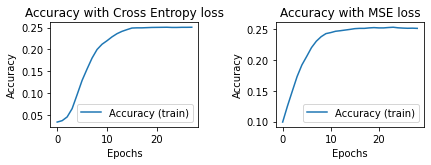

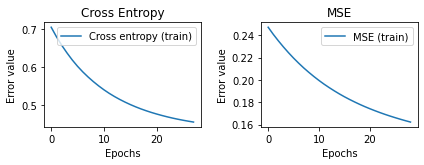

In [11]:
#Plots
pyplot.figure(0)
pyplot.subplot(2, 2, 1)
pyplot.plot(history_ce.history['accuracy'], label='Accuracy (train)')
pyplot.title("Accuracy with Cross Entropy loss")
pyplot.ylabel("Accuracy")
pyplot.xlabel("Epochs")
pyplot.legend()

pyplot.subplot(2, 2, 2)
pyplot.plot(history_mse.history['accuracy'], label='Accuracy (train)')
pyplot.title("Accuracy with MSE loss")
pyplot.ylabel("Accuracy")
pyplot.xlabel("Epochs")
pyplot.legend()
pyplot.tight_layout()
pyplot.show()


# plot the cross entropy loss
pyplot.figure(1)
pyplot.subplot(2, 2, 1)
pyplot.plot(history_ce.history['loss'], label='Cross entropy (train)')
pyplot.title('Cross Entropy')
pyplot.xlabel('Epochs')
pyplot.ylabel('Error value')
pyplot.legend()

# plot the mse loss
pyplot.subplot(2, 2, 2)
pyplot.plot(history_mse.history['loss'], label='MSE (train)')

pyplot.title('MSE')
pyplot.xlabel('Epochs')
pyplot.ylabel('Error value')
pyplot.legend()
pyplot.tight_layout()
pyplot.show()